# Tarea Académica 1 (TA1)

**Curso:** CC227 - Introduction to Deep Learning

**Profesor:** Jhosimar George Arias Figueroa

*Universidad Peruana de Ciencias Aplicadas (UPC)*

---

## Datos del Alumno

**Nombres y Apellidos:** *Renzo Damian*

**Código:** *u201715785*

---
## Fecha de Entrega 

Puede entregar el trabajo hasta el día **Lunes 05 de Setiembre del 2022** hasta las 23:59 horas.

## Nombre del archivo

Deberá subir su trabajo con el nombre **u201715785_TA1**

## Sobre el trabajo

Puede acceder a la versión del trabajo en colab desde [aquí](https://colab.research.google.com/drive/1UeW4NTvGNn4WYku8cGG7jn9hCaWqAMpJ?usp=sharing).

Deberá sacar una copia a este notebook desde "Archivo -> Guardar una copia en Drive", y deberá completar todas las líneas de código que contengan comentarios TODO o esten inicializadas como None.

## Objetivos

En este trabajo implementará un clasificador de regresión logística usando operaciones sobre tensores y funciones predefinidas de PyTorch. Los objetivos del trabajo son los siguientes:

- Aprenderá a implementar formulaciones matemáticas de forma eficiente usando tensores de PyTorch
- Repasará conceptos básicos de machine learning que serán necesarios en futuros trabajos
- Conocerá el flujo de trabajo usado al entrenar redes neuronales simples
- Se familiarizará más con las funciones predefinidas de PyTorch y su simplicidad
- Implementará todo el proceso, desde particionamiento de datos hasta las métricas de evaluación, usando diferentes operaciones y métodos de PyTorch

## Calificación

La nota del trabajo está basada en el puntaje total obtenido en este notebook y está dividido de la siguiente manera:

#### Preparación del conjunto de datos (2 puntos)

- Convertir la data a tensores (1 punto)
- Particionamiento de datos (1 punto)

#### Regresión logística desde cero (12 puntos)

- Función de Activación (1 punto)
- Inicialización de parámetros (1 punto)
- Definición del Modelo (1 punto)
- Función de Pérdida (1 punto)
- Optimización (3 puntos)
- Entrenamiento (3 puntos)
- Predicción (1 punto)
- Métrica de Evaluación (1 punto)

#### Regresión logística usando métodos predefinidos (6 puntos)

- Modelo (1.5 puntos)
- Función de Pérdida (0.5 puntos)
- Gradiente Descendente Estocástico (0.5 puntos)
- Entrenamiento (2 puntos)
- Predicción (0.5 puntos)
- Métrica de Evaluación (0.5 puntos)
- Prueba Final (0.5 puntos)

El puntaje total es de $20$. 

*Los puntajes de la segunda parte son más bajos debido a que los métodos se implementan de manera similar a los de la primera parte del trabajo. La diferencia es que los parámetros no se usan explicitamente ya que están encapsulados en los módulos de PyTorch.*


# Clasificador de Regresión Logística

Este trabajo está basado en la implementación del clasificador de regresión logística el cual será aplicado sobre un conjunto de datos sintéticos. El flujo de trabajo se puede visualizar en la siguiente imagen:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1Uyzxq2Dez-5BW9yLOyCdyVfnwvg3BUZy" width="1000px" />
<p/>

*Si no puede visualizar la imagen haga click [aqui](https://drive.google.com/uc?export=view&id=1Uyzxq2Dez-5BW9yLOyCdyVfnwvg3BUZy)*

## Importación de bibliotecas

Empecemos importando las bibliotecas que serán usadas en este trabajo `numpy`, `matplotlib` y `torch`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # visualizaciones
import torch # operaciones sobre tensores
import random # para números aleatorios
from sklearn.datasets import make_classification # generación de datos
from sklearn.datasets import make_blobs # generación de datos
from matplotlib.colors import ListedColormap # mapas de color

## Seeds para reproducibilidad

Un paso muy importante a la hora de implementar nuestros modelos es el uso de `seeds` que permitirá reproducir los resultados obtenidos.

In [2]:
# Función para establecer el "seed"
def set_seed(seed):
  random.seed(seed)        # seed para generación de números aleatorios
  torch.manual_seed(seed)  # seed de torch

set_seed(42)

## Preparación del conjunto de datos

En esta sección generaremos un conjunto de datos artificial, el cual convertirá a tensores y lo particionará en conjuntos de entrenamiento, validación y prueba.

### Generación del conjunto de datos

Antes de iniciar con la implementación, generaremos un conjunto de datos. Para simplificar las cosas, construiremos un conjunto de datos artificial. Mantendremos los datos de dimensiones reducidas para que podamos visualizarlos fácilmente.

En el siguiente código, generamos un conjunto de datos que contiene 1000 muestras, cada uno de los cuales consta de 2 características. Por lo tanto, nuestro conjunto de datos sintéticos será una matriz $\mathbf{X}\in \mathbb{R}^{1000 \times 2}$.

La clase roja tendrá la etiqueta 1 y la clase azul la etiqueta 0. Para generar los datos usaremos `scikit-learn`, no usaremos esta biblioteca para otros fines.

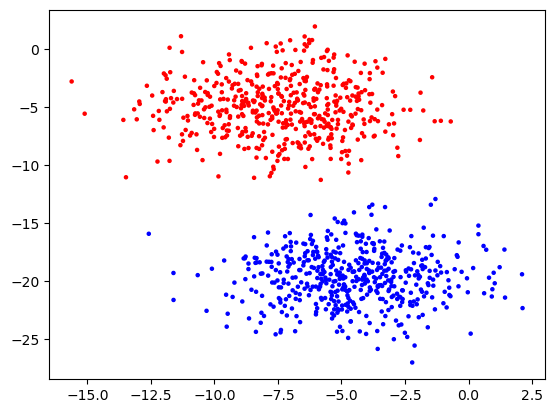

In [3]:
# Crear mapas de color para visualización
cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF', '#FF0000'])

# Generamos data aleatoria
X_array, y_array = make_blobs(1000, 2, centers=2, random_state=10, cluster_std = 2.5)
X_array = X_array - 10

# Visualizamos la data generada
plt.scatter(X_array[:, 0], X_array[:, 1], c=y_array, s=5, cmap=cmap_bold)
plt.show()

Podemos observar que la data es linealmente separable. Por lo tanto, se espera encontrar el límite de decisión óptimo.

### Convertir la data a tensores (1 punto)

La data generada es una lista de listas de python. Sin embargo, trabajará con tensores. Por lo tanto, será necesario convertir la data a tensores: 

In [4]:
# TODO: Convertir los arreglos X_array y y_array a tensores
#       especificar el tipo de dato como torch.float para ambos
#       datos (X) y etiquetas (y_true) 
X = torch.tensor(X_array, dtype=torch.float)
y = torch.tensor(y_array, dtype=torch.float)

# TODO: Actualmente 'y' es un vector de dimensión (n), deberá convertir
#       este vector a su forma matricial. Puede usar .view o .reshape
#       El tamaño deseado es (n,1)
y = torch.reshape(y, (y.shape[0], 1))

# Verificación de implementación
assert(torch.is_tensor(X) == True)
assert(torch.is_tensor(y) == True)
assert(X.dtype == torch.float)
assert(y.dtype == torch.float)
assert(y.shape == (X.shape[0],1))

print('Tamaño del dataset: ', X.shape)
print('Tamaño de las etiquetas: ', y.shape)

Tamaño del dataset:  torch.Size([1000, 2])
Tamaño de las etiquetas:  torch.Size([1000, 1])


### Particionamiento de datos (1 punto)

Como no contamos con un conjunto de datos de validación y de prueba, el primer paso es particionar los datos.

#### Particionamiento Hold-out

Particionaremos el conjunto de datos en entrenamiento y prueba. Para ello, adicionaremos un parámetro `train_size` con valores entre $0$ y $1$ que indica el porcentaje de datos a considerar en la data de entrenamiento. Por ejemplo, si tenemos $1000$ datos y especificamos `train_size` igual a $0.8$. Entonces el método retornará dos conjuntos de datos: $(X_{train}, y_{train})$ y $(X_{test}, y_{test})$ con $800$ y $200$ muestras respectivamente.

In [5]:
def train_test_split(X, y, train_size=0.8):
  '''
    Este método permite dividir un conjunto de datos (X,y) en dos conjuntos 
    de datos (X_train, y_train) y (X_test, y_test) dada la proporción de datos 
    de entrenamiento deseado. 

    Es necesario aleatorizar los datos antes de realizar la división.
    
    Args:
      - X: dataset de dimensión (n, m), donde n es el número de muestras y
           m es el número de características.
      - y: arreglo de dimensión (n), donde n es el número de muestras. Este
           arreglo contiene las etiquetas (clases) de la data.
      - train_size: representa la proporción del conjunto de datos a incluir en 
                    la data de entrenamiento.

    Returns:
      - X_train: tensor de dimensión (n_train, m)
      - y_train: tensor de dimensión (n_train)
      - X_test: tensor de dimensión (n_val, m)
      - y_test: tensor de dimensióm (n_val)

    Note: 
      - Los datos particionados deben sumar el total (n_train+n_val = n)
      - Implementar el método usando solo operaciones de tensores de torch.
      - No es válido usar métodos como split o random_split
      - A continuación se deja una plantilla que puede usar, pero no es
        obligatorio, puede realizar la implementación como mejor le parezca.
  '''
  n = X.shape[0]

  # TODO: Crear una lista de índices aleatorios de los datos. Puede usar torch.randperm
  indices = torch.randperm(n)

  # TODO: Definir el número de muestras de la data de entrenamiento
  n_train = int(n*train_size)


  # TODO: Seleccionar los índices que se usarán en la data de entrenamiento y de prueba
  train_indices = indices[:n_train]
  test_indices = indices[n_train:]

  # TODO: Particionar los datos usando los índices seleccionados anteriormente
  X_train, y_train = X[train_indices], y[train_indices]
  X_test, y_test = X[test_indices], y[test_indices]

  # Retornamos los conjuntos de datos particionados
  return X_train, y_train, X_test, y_test

Verifiquemos si las dimensiones del método de particionamiento implementado son las correctas:

In [6]:
# Test para probar la implementación del particionamiento de datos
train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
correct = True
for train_size in train_sizes:
  _X_train, _y_train, _X_test, _y_test = train_test_split(X, y, train_size)
  difference = X.shape[0] - _X_train.shape[0] - _X_test.shape[0]
  difference_y = y.shape[0] - _y_train.shape[0] - _y_test.shape[0]
  if difference != 0 or difference_y != 0:
    print(':( Las dimensiones del particionamiento no son correctas.\n')
    print(f'Total: ({X.shape},{y.shape})')
    print(f'Train: ({_X_train.shape},{_y_train.shape})')
    print(f'Test: ({_X_test.shape},{_y_test.shape})')
    correct = False
    break
  elif _y_train.shape[1] != 1 or _y_test.shape[1] != 1:
    print(':( Las dimensiones de las etiquetas no son correctas.\n')
    print(f'y train: {_y_train.shape}')
    print(f'y test: {_y_test.shape}')
if correct:
  print(':) Las dimensiones del particionamiento son correctas.')

:) Las dimensiones del particionamiento son correctas.


Realizaremos el particionamiento de los datos considerando 60% para entrenamiento, 20% para validación y 20% para prueba:

In [7]:
# Particionamos el conjunto de datos en entrenamiento (train), validación (val)
# y prueba (test)
_X_train, _y_train, X_test, y_test = train_test_split(X, y, train_size=0.8)
X_train, y_train, X_val, y_val = train_test_split(_X_train, _y_train, train_size=0.75)

print('Tamaño original del dataset:', X.shape)
print('---------------------------')
print('Tamaño de la data de entrenamiento:', X_train.shape)
print('Tamaño de la data de validación:', X_val.shape)
print('Tamaño de la data de prueba:', X_test.shape)

Tamaño original del dataset: torch.Size([1000, 2])
---------------------------
Tamaño de la data de entrenamiento: torch.Size([600, 2])
Tamaño de la data de validación: torch.Size([200, 2])
Tamaño de la data de prueba: torch.Size([200, 2])


### Visualización del conjunto de datos

Procederemos con la visualización de los particionamientos previamente realizados. En este paso solo mostraremos la data de entrenamiento y de validación para saber el tipo de clasificación que necesitamos realizar. La data de prueba solo la usaremos al final de este trabajo.

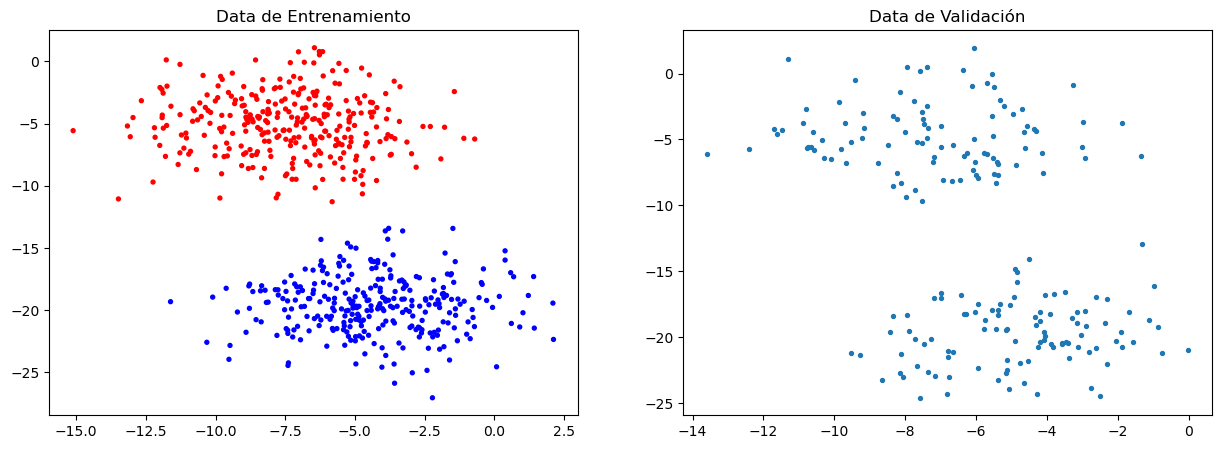

In [8]:
def plot_dataset(X_train, y_train, X_test, y_test, is_validation=True):
  """
    Este método permite visualizar nuestros datos de entrenamiento y prueba
  """
  plt.subplots(figsize =(15, 5))
  #plt.subplots(figsize =(11, 4))
  plt.subplot(1, 2, 1)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=8, cmap=cmap_bold)  
  plt.title('Data de Entrenamiento')
  plt.subplot(1, 2, 2)
  plt.scatter(X_test[:,0], X_test[:,1], s=8)
  if is_validation:
    plt.title('Data de Validación')
  else:
    plt.title('Data de Prueba')
  plt.show()

plot_dataset(X_train.numpy(), y_train.numpy(), X_val.numpy(), y_val.numpy())

## Regresión logística desde cero (12 puntos)

En esta sección implementará el método desde cero incluyendo el modelo, la función de pérdida y el optimizador de gradiente descendente. Si bien los frameworks de deep learning modernos pueden automatizar casi todo este trabajo, implementar las cosas desde cero es la única forma de asegurarnos de que realmente sabemos lo que estamos haciendo. 

La implementación estará basada solamente en operaciones sobre tensores, no es válido usar paquetes como `torch.nn` o `torch.optim`. Más adelante, realizará una implementación más concisa, aprovechando los métodos ya definidos de PyTorch. 

### Función de Activación (1 punto)

La función de activación usada en regresión logística es la función sigmoidea:

\begin{align*}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{align*}

A continuación, deberá implementar esta función:

In [9]:
def sigmoid(z):
  '''
    Este método implementa la función sigmoidea
    
    Args:
      - z: un escalar o tensor de torch de tamaño variable

    Returns:
      - un escalar o tensor del mismo tamaño de z

  '''
  #TODO: Implemente la función sigmoidea
  s = 1 / (1+ torch.exp(-z))

  assert(torch.is_tensor(s) == True)
  assert(s.shape == z.shape)
  return s

Recordemos que la idea principal de la función sigmoidea es que ajusta los valores entre 0 y 1. La función tiene una "forma de s" muy característica, que rápidamente va a 1 cuando z tiene al +∞ o va a 0 cuando z tiene al -∞. Esto hace que la función sea muy adecuada para la clasificación binaria. A continuación visualizaremos la función:

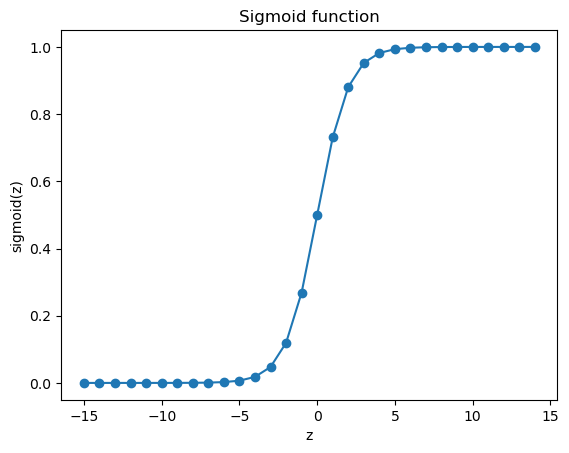

In [10]:
# Valores entre -15 y 15
z = torch.arange(-15, 15)
# Aplicamos la función sigmoide a los valores generados
s = sigmoid(z)

plt.plot(z.numpy(), s.numpy(), marker='o')
plt.title('Sigmoid function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.show()

### Inicialización de parámetros (1 punto)

Un paso importante es la inicialización de parámetros que deberá implementar en la siguiente función:

In [11]:
def initialize_params(m):
  """
    Este método crea dos tensores representando los pesos y el bias. 
    Inicializamos los pesos muestreando números aleatorios de una distribución 
    normal con media 0 y una desviación estándar de 0.01, y el bias con un 
    valor igual a 0. 
    
    Considerar que los pesos (w) tienen una dimensión de (m, 1) y el bias 
    tiene una dimensión de (1,)

    Args:
      - m: tamaño del tensor w que crearemos (número de características)
    
    Returns:
      - w: tensor de dimensión (m, 1)
      - b: tensor de dimensión (1,)
  """
  # TODO: Inicializar los pesos 'w' muestreando números aleatorios de una
  #       distribución normal com media 0 y desviación estándar 0.01.
  #       Puede usar métodos definidos de pytorch
  w = torch.normal(mean=torch.zeros(m, 1), std=0.01)

  # TODO: Inicializar el bias 'b' con zeros
  b = torch.zeros(1,)
  
  # Verificamos la implementación
  assert(w.shape == (m, 1))
  assert(b.shape == (1,))
  assert(torch.is_tensor(w))
  assert(torch.is_tensor(b))

  return w, b

In [12]:
# Probemos la implementación
m = 2
w, b = initialize_params(m)
print ("w = " + str(w))
print ("b = " + str(b))

w = tensor([[0.0068],
        [0.0083]])
b = tensor([0.])


### Límite de decisión

Podemos visualizar el limite de decisión acorde a los parámetros aleatorios:

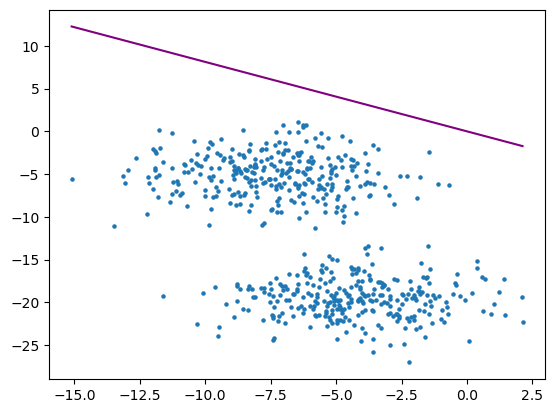

In [13]:
def plot_decision_boundary_no_label(X, w, b):
  plt.scatter(X[:, 0], X[:, 1], s=5, cmap=cmap_bold)  
  x_values = torch.tensor([X[:,0].min(), X[:,0].max() ])
  if w[1] > 0:
    y_values = -(b + x_values * w[0])/ w[1]
  else: 
    y_values = -(b + x_values * w[0])
  plt.plot(x_values, y_values, c='purple')
  plt.show()  

plot_decision_boundary_no_label(X_train, w, b)

Como podemos observar el limite de decisión inicial no separa ambas clases de forma correcta, esto se debe a que los parámetros poseen valores aleatorios.

### Definición del Modelo (1 punto)

A continuación, definiremos el modelo. Al igual que en regresión lineal, la transformación afín ($z$) está dada por el producto de la matriz de las características de entrada $\mathbf{X}$ y el vector de pesos $\mathbf{w}$, sumados con el bias $b$. Es decir,

$$z = \mathbf{X} \mathbf{w} + b,$$

como lo mencionado en clase, una interpretación de $z$ es que son distancias al límite de decisión. En regresión logística estamos interesados en predecir probabilidades. Por lo tanto, tenemos que aplicar la función sigmoide a la transformación afín. Como resultado obtendremos las predicciones del modelo:

$$\hat y = \sigma(z),$$

donde $\sigma$ es la función sigmoide previamente implementada.


In [14]:
def model(X, w, b):
  """
    Este método realiza la transformación afín entre los datos de entrada
    y los parámetros, luego se obtienen probabilidades aplicando la función de 
    activación sigmoide previamente implementada.

    Args:
      - X: tensor de dimensión (n, m), donde n es el número de datos y m
           es el número de características
      - w: tensor de dimensión (m, 1), representando los pesos del modelo
      - b: tensor de dimensión (1,), representando el bias del modelo

    Returns:
      - y_pred: tensor de dimensión (n, 1), representando las predicciones
                con valores entre 0 y 1
  """
  # TODO: Implementar la transformación afín
  z = X @ w + b

  # TODO: Aplicar la función de activación sigmoide
  y_pred = sigmoid(z)

  assert(y_pred.shape == (X.shape[0], 1))
  return y_pred

Podemos probar la implementación, prediciendo valores para la data de entrenamiento:

In [15]:
# Probemos si el código se ejecuta de forma correcta
y_pred_train = model(X_train, w, b)

print('Predicciones iniciales')
print(y_pred_train[0:10])

Predicciones iniciales
tensor([[0.4742],
        [0.4925],
        [0.4582],
        [0.4423],
        [0.4543],
        [0.4524],
        [0.4460],
        [0.4774],
        [0.4840],
        [0.4721]])


El modelo nos devuelve la predicción actual (probabilidades) dados los parámetros y la data. Los valores deben estar entre 0 y 1.

### Función de Pérdida (1 punto)

La función de pérdida usual para clasificación binaria es la *entropía cruzada binaria (binary cross-entropy)* entre los valores predichos, $\hat y$, y los valores reales, $y$.

$$\mathcal{l}^{(i)}(\mathbf{w}, b) = - y^{(i)} \log(\hat y^{(i)}) - (1 - y^{(i)}) \log(1 - \hat y^{(i)}).$$

Para medir la calidad de un modelo en todo el conjunto de datos de $n$ ejemplos, simplemente promediamos las pérdidas en el conjunto de entrenamiento

$$\mathcal{L}(\mathbf{w}, b)= \frac{1}{n}\sum_{i=0}^n l^{(i)}(\mathbf{w}, b) = -\frac{1}{n} \sum_{i=0}^n y^{(i)} \log(\hat y^{(i)}) + (1 - y^{(i)}) \log(1 - \hat y^{(i)}),$$

donde $\hat y^{(i)} = \sigma (\mathbf{w}^\top \mathbf{x}^{(i)} + b)$ es la predicción del modelo. 

A continuación implementará la función de pérdida:


In [16]:
def log(z, eps=1e-20):
  """
     Logaritmo numéricamente estable
  """
  return torch.log(torch.maximum(z, torch.tensor(eps)))

def BCE(y_pred, y_true):
  """
    Este método calcula la función de pérdida de entropía cruzada binaria.

    Args:
      - y_pred: tensor de dimensión (n, 1), representando probabilidades
      - y_true: tensor de dimensión (n, 1), representando los valores reales (0 o 1)

    Returns:
      - cost: valor flotante representando el promedio de las pérdidas de cada muestra
  """
  #TODO: Usando la formulación anteriormente definida, implemente la función
  #      de pérdida. Implementar la versión vectorizada sin usar bucles.
  #      * No usar torch.log() directamente, mejor use la función log() 
  #        definida anteriormente. 
  cost = torch.mean(-y_true * log(y_pred) - (1 - y_true) * log(1-y_pred))
  
  return cost


In [17]:
# Probemos la implementación del método
print("Error actual: ", BCE(y_pred_train, y_train).item())

Error actual:  0.6724938750267029


### Optimización (3 puntos)

Para optimizar el modelo implementará el algoritmo de gradiente descendente. La aplicación más simple de este algoritmo consiste en tomar la derivada de la función de pérdida, que es un promedio de las pérdidas calculadas en cada uno de los ejemplos del conjunto de datos. En la práctica, esto puede ser extremadamente lento: debemos pasar todo el conjunto de datos antes de realizar una sola actualización. Por lo tanto, a menudo nos conformaremos con muestrear un mini lote aleatorio de ejemplos cada vez que necesitemos calcular la actualización de parámetros, una variante llamada *mini-batch gradient descent*. 

La siguiente figura muestra un ejemplo de como se calculan los gradientes usando mini lotes:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1AjhlqZdJq9tm_vCdtL6xwwIqSnH7dla4" width="800px" />
<p/>

*Si no puede visualizar la imagen haga click [aqui](https://drive.google.com/uc?export=view&id=1AjhlqZdJq9tm_vCdtL6xwwIqSnH7dla4)*

El primer paso es particionar la data en mini lotes aleatorios, los cuales serán usados de forma independiente para realizar predicciones y calcular la pérdida. El segundo paso es calcular los gradientes de la función de pérdida por lote. Finalmente se realiza la actualización de parámetros usando los gradientes calculados.



#### Particionamiento en mini lotes (1 punto)

El primer paso del algoritmo es particionar los datos en mini lotes. Para ello, en cada iteración obtenemos un mini lote, $\mathcal{B}$, que consta de un número fijo de muestras. En la figura previamente mostrada se usan mini lotes de tamaño tres ($|B|=3$). Tener en cuenta que muchas veces no es posible obtener un lote de tamaño exacto (Lote 4), esto ocurre cuando el número de datos no es divisible por el tamaño del lote ingresado. Asimismo, considerar que para la data de entrenamiento es necesario aleatorizar los datos antes de realizar el particionamiento en lotes, esto es opcional para la data de prueba.

A continuación implementará el método que permita particionar la data en lotes dado el tamaño del lote (`batch_size`) y si se desea aleatorizar los datos antes del particionamiento (`shuffle`). Esta última opción es necesaria usarla durante el entrenamiento:



In [18]:
def data_iter(X, y, batch_size, shuffle=True):
  """
    Este método particiona la data en mini lotes de forma aleatoria acorde al 
    batch_size. En caso el número de datos, n, no sea divisible por el batch_size,
    considerar los datos faltantes como un lote. Por ejemplo: Si n = 11 y 
    batch_size=3 entonces tenemos tres lotes con 3 muestras y un lote con 2 muestras

    Args:
      - X: tensor de dimensión (n, m), donde n es el número de datos y m
           es el número de características
      - y: tensor de dimensión (n, 1), representando los valores reales
      - batch_size: tamaño de cada lote
      - shuffle: True para que los datos se aleatoricen en cada época

    Returns:
      - Los lotes actuales mediante 'yield' para usar el método como iterador
  """
  n = X.shape[0]
  
  if shuffle:
    # TODO: Crear una lista de índices aleatorios de los datos. Puede usar torch.randperm
    indices = torch.randperm(n)
  else:
    indices = range(n)

  # Iteramos sobre los datos considerando el tamaño de cada lote (batch_size)
  for i in range(0, n, batch_size):
    
    # TODO: Obtenga los índices del lote actual. El tamaño de cada lote debe 
    #       ser igual a batch_size con excepción del último lote que
    #       puede ser <= batch_size
    batch_indices = indices[i:i+batch_size]
    # TODO: Obtenga el lote de los datos y etiquetas usando los índices
    #       previamente seleccionados
    X_batch, y_batch = X[batch_indices], y[batch_indices]

    # Retornamos los lotes actuales con yield para usar el método como iterador
    yield X_batch, y_batch

Probaremos la implementación mostrando el tamaño de cada lote:

In [19]:
# Tamaño de cada lote
batch_size = 32

# Número total de muestras
total_samples = 0

# Iteramos sobre todos los datos y mostramos el tamaño de cada lote
for i, (X_batch, y_batch) in enumerate(data_iter(X_train, y_train, batch_size), 1):
  total_samples += X_batch.shape[0]
  print(f'Lote {i} tiene tamaño {X_batch.shape[0]}')

if total_samples == X_train.shape[0]:
  print(':) El número total de muestras por lotes es correcto.')
else:
  print(':( El número total de muestras por lotes difiere del total de muestras.')

Lote 1 tiene tamaño 32
Lote 2 tiene tamaño 32
Lote 3 tiene tamaño 32
Lote 4 tiene tamaño 32
Lote 5 tiene tamaño 32
Lote 6 tiene tamaño 32
Lote 7 tiene tamaño 32
Lote 8 tiene tamaño 32
Lote 9 tiene tamaño 32
Lote 10 tiene tamaño 32
Lote 11 tiene tamaño 32
Lote 12 tiene tamaño 32
Lote 13 tiene tamaño 32
Lote 14 tiene tamaño 32
Lote 15 tiene tamaño 32
Lote 16 tiene tamaño 32
Lote 17 tiene tamaño 32
Lote 18 tiene tamaño 32
Lote 19 tiene tamaño 24
:) El número total de muestras por lotes es correcto.


#### Gradiente de la función de pérdida (1 punto)

El siguiente paso es calcular el gradiente de la función de pérdida con respecto a los parámetros del modelo. El gradiente de la entropía cruzada binaria (BCE) con respecto a los pesos, está dado por lo siguiente:

$$ \nabla_{\mathbf{w}} \mathcal{L}(\mathbf{w},b) = \frac{1}{n} \mathbf X^\top (\hat y - y),$$

donde $\hat y = \sigma( \mathbf{Xw} + b)$. El gradiente con respecto al bias, está dado por lo siguiente:

$$ \nabla_{b} \mathcal{L}(\mathbf{w},b) = \frac{1}{n} \mathbf 1^\top (\hat y - y),$$

donde $ \mathbf{1}$ es una matriz columna de unos, creada a partir del gradiente con respecto al bias el cual es igual a $1$ para todas las muestras. Recuerde que esta multiplicación por la matriz columna de unos se puede reducir a una sumatoria. A continuación, deberá de implementar el método que retorna los gradientes dado un conjunto datos y los parámetros del modelo:

In [20]:
def gradient(X, y_pred, y_true):
  """
    Este método calcula el gradiente de la función de pérdida BCE.

    Args:
      - X: tensor de dimensión (n, m), donde n es el número de datos y m
           es el número de características
      - y_pred: tensor de dimensión (n, 1), representando probabilidades
      - y_true: tensor de dimensión (n, 1), representando los valores reales

    Returns:
      - w_grad: tensor de dimensión (m, 1), representando los gradientes de los pesos
      - b_grad: tensor de dimensión (1,), representando los gradientes del bias
  """

  # Nos aseguramos de que y_true tenga las mismas dimensiones que y_pred
  n = X.shape[0]

  # TODO: Implemente el gradiente con respecto a los pesos y el bias siguiendo
  # las formulaciones brindadas anteriormente
  w_grad = X.t()@(y_pred - y_true)/n
  b_grad =  torch.ones(n) @ (y_pred - y_true)/n

  # Verificamos dimensiones de resultados
  assert(w_grad.shape == (X.shape[1], 1))
  assert(b_grad.shape == (1,))

  return w_grad, b_grad 

In [21]:
# Probemos la funcionalidad del método
w_grad, b_grad = gradient(X_train, y_pred_train, y_train)

print("Gradiente de w: ", w_grad)
print("Gradiente de b: ", b_grad)

Gradiente de w:  tensor([[ 1.0353],
        [-2.9797]])
Gradiente de b:  tensor([-0.0452])


#### Actualización de parámetros (1 punto)

El último paso es actualizar los parámetros usando los gradientes por cada mini lote. Para ello, cada gradiente lo multiplicamos por la tasa de aprendizaje $\eta$ y restamos el término resultante de los valores de los parámetros actuales. Podemos expresar la actualización de un mini lote matemáticamente de la siguiente manera ($\nabla$ denota el gradiente):

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \nabla_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

A diferencia de la implementación full-batch (visto en el notebook de regresión lineal), podemos ver que en esta versión dividimos por el tamaño del lote $|\mathcal{B}|$, ya que consideramos un subconjunto de muestras en lugar de todo el conjunto de datos.

In [22]:
def gradient_descent_step(w, b, w_grad, b_grad, learning_rate):
  """
    Este método calcula un paso de gradiente descendente

    Args:
      - w: tensor de dimensión (m, 1), representando los pesos del modelo
      - b: tensor de dimensión (1,), representando el bias del modelo
      - w_grad: tensor de dimensión (m, 1), representando los gradientes de los pesos
      - b_grad: tensor de dimensión (1,), representando los gradientes del bias
      - learning_rate: constante representando la tasa de aprendizaje

    Returns:
      No retornamos nada, pero actualizamos los parámetros w y b por referencia  
  """
  # TODO: Actualice los pesos usando gradiente descendente
  w -= w_grad * learning_rate

  # TODO: Actualice el bias usando gradiente descendente
  b -= b_grad * learning_rate
  #return w , b

Verifiquemos si la implementación actualiza los parámetros:

In [23]:
# Creamos parámetros temporales para probar la implementación
w, b = initialize_params(m)

# Realizamos un paso de gradiente descendente
gradient_descent_step(w, b, w_grad, b_grad, 0.1)
# Mostramos los parámetros actualizados
print ("w = " + str(w))
print ("b = " + str(b))

w = tensor([[-0.1047],
        [ 0.3088]])
b = tensor([0.0045])


Los parámetros actualizados deben ser diferentes de cero.

### Entrenamiento (3 puntos)

En las secciones anteriores se han implementado diferentes métodos que se usarán durante el entrenamiento. Recordar que el entrenamiento se realiza durante un número específico de épocas. En cada época iteramos sobre todo el conjunto de datos y realizamos el entrenamiento. Una fase adicional e importante es la validación del modelo que se realiza una vez terminado el entrenamiento por época. En términos generales, el algoritmo está dado por lo siguiente:

* Inicializar los parámetros $(\mathbf{w}, b)$
* Iterar por un determinado número de épocas. Para cada época:
    * Entrenar el modelo usando la data de entrenamiento
    * Validar el modelo usando la data de validación

A continuación, se implementarán métodos para el entrenamiento y validación por época y luego usaremos estas funciones en un método de entrenamiento principal.

#### Fase de Entrenamiento (1 punto)
 
Durante esta fase se usará la data de entrenamiento `(X_train, y_train)`. En esta fase **actualizamos los parámetros del modelo** mediante gradiente descendente usando mini lotes. El algoritmo es el siguiente:

* Iterar sobre el conjunto de datos usando mini lotes. Para cada mini lote ($\mathbf{X}, y$):

  * Predecir probabilidades $\hat y \leftarrow \sigma(\mathbf{X}\mathbf{w} + b)$
  * Calcular el gradiente $\mathbf{g} \leftarrow \nabla_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\hat{y}^{(i)}, y^{(i)}, \mathbf{w}, b)$
  * Actualizar los parámetros $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

A continuación, se definirá un método para realizar las operaciones de entrenamiento:

In [24]:
def train_step(X_train, y_train, w, b, learning_rate, batch_size):
  """
    Este método realiza la fase de entrenamiento usando la data de entrenamiento 
    (X_train, y_train) la que usaremos para actualizar los parámetros del modelo.

    Args:
      - X_train: tensor de dimensión (n, m), donde n es el número de 
            datos de entrenamiento y m es el número de características
      - y_train: tensor de dimensión (n, 1), representando las etiquetas
            reales de la data de entrenamiento 
      - w: tensor de dimensión (m, 1), representando los pesos del modelo
      - b: tensor de dimensión (1,), representando el bias del modelo
      - learning_rate: tasa de aprendizaje
      - batch_size: tamaño de cada lote

    Returns:
      - train_loss: pérdida total de la data de entrenamiento
  """
  n, m = X_train.shape
  
  # Pérdida de entrenamiento total
  train_loss = 0.

  # Iteramos sobre todos los datos de entrenamiento usando mini lotes
  for X, y in data_iter(X_train, y_train, batch_size):

    # TODO: Obtener probabilidades del lote actual a partir del modelo
    y_pred = model(X,w,b)

    # TODO: Calcular la pérdida usando el método BCE
    loss = BCE(y_pred,y)

    # TODO: Calcular los gradientes de la función de pérdida usando el lote de
    #       entrenamiento (X, y) y sus predicciones
    w_grad, b_grad = gradient(X, y_pred, y)

    # TODO: Actualizar los parámetros con gradiente descendente
    gradient_descent_step(w,b,w_grad,b_grad,learning_rate)

    # Acumulamos pérdida
    train_loss += loss.item() * X.shape[0]

  # Pérdida promedio
  train_loss /= n

  return train_loss

In [25]:
# Probemos la implementación
m = 2
w, b = initialize_params(m)
print(f'Error de entrenamiento: {train_step(X_train, y_train, w, b, 0.001, 32):.8f}')

Error de entrenamiento: 0.67249684


Se espera un error de entrenamiento mayor a $0.5$ y menor a $0.7$.

#### Fase de Validación (1 punto)

Siempre es importante validar el modelo para saber si está generalizando correctamente, es por ello que usaremos la data de validación `(X_val, y_val)`. La validación se llevará a cabo en cada época, luego de la fase de entrenamiento. Recuerde que en la fase de validación **no actualizamos los parámetros**, por lo tanto, no calculamos gradientes y no usamos gradiente descendente. El algoritmo es el siguiente:

* Iterar sobre el conjunto de datos usando mini lotes. Para cada mini lote ($\mathbf{X}, y$):

  * Predecir probabilidades $\hat y = \sigma(\mathbf{X}\mathbf{w} + b)$
  * Calcular el error $\frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\hat{y}^{(i)}, y^{(i)}, \mathbf{w}, b)$
  
A continuación, se definirá un método para realizar las operaciones de validación:

In [39]:
def validation_step(X_val, y_val, w, b, batch_size):
  """
    Este método realiza la fase de validación usando la data de validación 
    (X_val, y_val) y los parámetros del modelo entrenado.

    Args:
      - X_val: tensor de dimensión (n_val, m), donde n_val es el número de 
            datos de validación y m es el número de características
      - y_val: tensor de dimensión (n_val, 1), representando las etiquetas
            reales de la data de validación 
      - w: tensor de dimensión (m, 1), representando los pesos del modelo
      - b: tensor de dimensión (1,), representando el bias del modelo
      - batch_size: tamaño de cada lote

    Returns:
      - val_loss: pérdida de toda la data de validación
  """
  n_val, m = X_val.shape
  
  # Pérdida de validación total
  val_loss = 0.

  # Debido a que en la fase de validación no actualizamos los parámetros
  # no es necesario usar los gradientes
  with torch.no_grad():

    # Iteramos sobre todos los datos de validación usando mini lotes
    # No es necesario aleatorizar la data de validación
    for X, y in data_iter(X_val, y_val, batch_size, False):

      # TODO: Obtener probabilidades del lote actual a partir del modelo
      y_pred = model(X, w, b)

      # TODO: Calcular la pérdida usando el método BCE 
      loss = BCE(y_pred, y)
      
      # Acumulamos pérdida
      val_loss += loss.item() * X.shape[0]

  # Pérdida promedio
  val_loss /= n_val

  return val_loss

In [40]:
# Probemos la implementación
print(f'Error de validación: {validation_step(X_val, y_val, w, b, 32):.8f}')

Error de validación: 0.55037941


#### Fase Principal (1 punto)

Ahora que tenemos todas las partes en su lugar, estamos listos para implementar el algoritmo de entrenamiento principal. Recordemos que el algoritmo está dado por lo siguiente:

* Inicializar los parámetros $(\mathbf{w}, b)$
* Iterar por un determinado número de épocas. Para cada época:
    * Entrenar el modelo usando la data de entrenamiento
    * Validar el modelo usando la data de validación

En cada *época*, iteraremos a través de todo el conjunto de datos usando mini lotes. El número de épocas, `num_epochs`, la tasa de aprendizaje, `lr`, y el tamaño del lote, `batch_size`, son hiperparámetros que debemos definir previos al entrenamiento. Desafortunadamente, definir los valores de los hiperparámetros es complicado y requiere algunos ajustes por prueba y error. 

In [41]:
def train_model(X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size):
  """
    Este método realiza el entrenamiento del modelo usando (X_train, y_train), y
    valida los resultados con (X_val, y_val).

    Args:
      - X_train: tensor de dimensión (n, m), donde n es el número de 
            datos de entrenamiento y m es el número de características
      - y_train: tensor de dimensión (n, 1), representando las etiquetas
            reales de la data de entrenamiento     
      - X_val: tensor de dimensión (n_val, m), donde n_val es el número de 
            datos de validación y m es el número de características
      - y_val: tensor de dimensión (n_val, 1), representando las etiquetas
            reales de la data de validación 
      - num_epochs: número de épocas
      - learning_rate: tasa de aprendizaje
      - batch_size: tamaño de cada lote

    Returns:
      - w: tensor de dimensión (m, 1), representando los pesos actualizados
      - b: tensor de dimensión (1,), representando el bias actualizado
  """
  n, m = X_train.shape

  # TODO: Inicializar los los parámetros del modelo
  w, b = None

  # TODO: Iterar sobre el número de épocas especificado
  for epoch in range(num_epochs):
    # Fase de Entrenamiento
    # TODO: Usar el método antes implementado para realizar el entrenamiento
    train_loss = None

    # Fase de Validación
    # TODO: Usar el método antes implementado para realizar la validación    
    val_loss = None

    # Imprimimos los errores de entrenamiento y validación
    print(f'Epoch ({epoch+1}/{num_epochs}): train_loss = {train_loss:.8f}, val_loss= {val_loss:.8f}')

  return w, b  

Ahora probaremos la implementación. Puede probar otros valores en los hiperparámetros que mejoren los resultados:

In [42]:
# Hiperparámetros
num_epochs = 500
learning_rate = 0.1
batch_size = 32

# Realizamos el entrenamiento
w, b = train_model(X_train, y_train, X_val, y_val, num_epochs, learning_rate, batch_size)

TypeError: cannot unpack non-iterable NoneType object

Como se puede observar, tanto el error de entrenamiento como el de validación comienzan a bajar, lo que nos indica que el entrenamiento se está realizando de forma correcta.

### Predicción (1 punto)

Las predicciones actuales son probabilidades. Sin embargo, en clasificación estamos interesados en valores discretos, en este caso nos interesan valores 0 y 1. Por lo tanto, podemos usar un threshold, si las probabilidades de predicción son mayores que ese threshold entonces clasificamos esos datos como clase 1 sino como clase 0.

In [ ]:
def predict(X, w, b, threshold=0.5):
  """ 
     Este método predice si la etiqueta es 0 o 1 utilizando los parámetros
     del modelo (w, b) y un threshold

    Args:
      - X: tensor de dimensión (n, m), donde n es el número de datos y m
           es el número de características
      - w: tensor de dimensión (m, 1), representando los pesos del modelo
      - b: tensor de dimensión (1,), representando el bias del modelo
      - threshold: umbral para obtener valores discretos a partir de probabilidades
    
    Returns:
      - y_pred: tensor de dimensión (n, 1), representando las predicciones
                con valores 0 o 1. No probabilidades.
  """    
  # Debido a que en esta fase no actualizamos los parámetros
  # no es necesario usar los gradientes
  with torch.no_grad():
    #TODO: Obtenga probabilidades a partir del modelo
    y_prob = None

    #TODO: Convierta las probabilidades en 0 (si activación < threshold) o 
    #      1 (si activación >= threshold), almacenar las predicciones en y_pred
    #      Se recomienda implementar la versión vectorizada (sin bucles)
    y_pred = None
  
  assert(y_pred.shape == y_prob.shape)
  return y_pred 

In [ ]:
# Probemos la implementación
y_pred_val = predict(X_val, w, b)

print('Primeras 10 predicciones: ')
print(y_pred_val[:10])

#### Límite de Decisión

Podemos visualizar el límite de decisión y las predicciones:

In [ ]:
def plot_decision_boundary(X, y, w, b):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=cmap_bold)  
  x_values = torch.tensor([X[:, 0].min(), X[:, 0].max()])
  #x_values = torch.tensor([-8, 15])
  if w[1] > 0:
    y_values = -(b + x_values * w[0])/ w[1]
  else: 
    y_values = -(b + x_values * w[0])#/ 1e-8
  plt.plot(x_values, y_values, c='purple')
  plt.show()  

In [ ]:
plot_decision_boundary(X_val, y_pred_val, w, b)

Podemos ver que el límite de decisión separa ambas clases, asi como las predicciones. Visualizar los resultados es algo bueno, pero solo se puede aplicar en datos con pocas dimensiones o características. Una mejor forma de evaluar el modelo es cuantificar los resultados y medir el rendimiento mediante métricas de evaluación.

### Métrica de Evaluación (1 punto)

Una forma de evaluar el rendimiento de nuestro modelo es mediante métricas de evaluación. Existen diferentes métricas para clasificación, en este trabajo usaremos el `accuracy`, el cual está definido de la siguiente manera:

$$\text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}} = \frac{1}{n}\sum_{i=0}^{n} \mathbb{I}(\hat y^{(i)} = y^{(i)} ),$$

donde $\mathbb{I}$ es una función indicadora que retorna 1 cada vez que se cumple la condición, caso contrario retorna 0.

In [ ]:
def accuracy(y_true, y_pred): 
  """
    Este método devuelve la métrica de evaluación 'accuracy' del clasificador.
    Recordar que accuracy cuenta la cantidad promedio de datos correctamente predichos
    para ello comparamos los valores reales, 'y_true', con los valores predichos,
    'y_pred', realizamos el conteo de valores correctamente clasificados y retornamos
    el promedio.

    Args: 
        - y_true: tensor de dimensión (n,1) conteniendo las etiquetas reales 
        - y_pred: tensor de dimensión (n,1) conteniendo las etiquetas predichas.
                  estas predicciones deben ser valores discretos (0 y 1), no probabilidades

    Returns:
        - accuracy: Accuracy del clasificador. Su valor estará en el rango de [0, 1], 
                    siendo 1 una clasificación perfecta.
  """ 
  n = y_true.shape[0]

  # TODO: Calcule el accuracy. Implementar la versión vectorizada (sin bucles)
  acc = None

  assert(acc >= 0 and acc <= 1)
  return acc

Podemos calcular el accuracy de la data de entrenamiento y validación. Para ello, son necesarias las predicciones que devuelven valores discretos (0 y 1).

In [ ]:
# TODO: Obtenga predicciones discretas para la data entrenamiento y validación
#       usando los parámetros w y b hallados durante el entrenamiento
y_pred_val = None
y_pred_train = None

# TODO: Calcule el accuracy de ambas predicciones
train_acc = None
val_acc = None

print(f'accuracy: entrenamiento={train_acc:.5f}, validación={val_acc:.5f}')

Ha culminado la implementación usando solamente operaciones sobre tensores. En la siguiente sección implementará el modelo usando métodos predefinidos de PyTorch.

## Regresión logística usando métodos predefinidos (6 puntos)

En esta sección, implementará el modelo usando métodos predefinidos de PyTorch. Es válido usar paquetes como `torch.nn` o `torch.optim`. 

### Importación de bibliotecas adicionales


In [ ]:
from torch import nn  # paquete de capas y funciones de activación
from torch import optim  # paquete de optimización

### Conjunto de datos

En esta parte usaremos la data sintética generada en la primera parte del trabajo.

In [ ]:
print('Tamaño original del dataset: ', X.shape)
print('---------------------------')
print('Tamaño de la data de entrenamiento: ', X_train.shape)
print('Tamaño de la data de validación: ', X_val.shape)
print('Tamaño de la data de prueba: ', X_test.shape)

### Modelo (1.5 puntos)

Para implementar el modelo, usaremos una capa lineal (`nn.Linear`) y la función de activación sigmoide (`nn.Sigmoid`). Ambos clases pueden ser accedidas a través del paquete `torch.nn`. Estas clases también se les conoce como módulos. En PyTorch, una red neuronal se construye a partir de módulos. Los módulos pueden contener otros módulos, y una red neuronal también se considera un módulo en sí. Recordemos que regresión logística puede ser representada como una red neuronal de una capa con varias entradas y una salida.

La plantilla básica de un módulo es la siguiente:

In [ ]:
class MyModule(nn.Module):

  def __init__(self):
    super().__init__()
    # Aqui podemos definir otros módulos

  def forward(self, x):
    # Aqui realizamos los cálculos con los módulos antes definidos
    pass

La función forward es donde se realizan los cálculos del módulo, y se ejecuta cuando llama al módulo (`net = MyModule(); net(x)`). En la función init, generalmente creamos los parámetros del módulo, usando `nn.Parameter`, o definiendo otros módulos que se usan en la función forward como `nn.Linear`. El cálculo de propagación hacia atrás se realiza automáticamente, pero también se puede sobrescribir si se desea.

#### Módulo de regresión logística

Ahora podemos hacer uso de los módulos predefinidos en el paquete `torch.nn` y definir nuestro propio modelo de regresión logística como una red neuronal. Como lo indicado anteriormente, usaremos una capa lineal (`nn.Linear`) que representa la transformación afín, y la función de activación sigmoide (`nn.Sigmoid`). Ambos módulo serán usados dentro de un módulo general llamado `LogisticRegressionNetwork`.

In [ ]:
# Módulo de regresión logística que lo implementa como una red neuronal
class LogisticRegressionNetwork(nn.Module):

  def __init__(self, num_features, num_outputs):
    """
      Constructor de la clase LogisticRegressionNetwork, que recibe dos parámetros
      para la creación del modelo

      Args: 
        - num_features: número de características de entrada (capa de entrada)
        - num_outputs: número de neuronas salidas (capa de salida)

      Returns:
        No se retorna nada pero se definen los módulos respectivos
    """ 
    super().__init__() # usado porque estamos heredando de la clase nn.Module
    
    # TODO: Definir un módulo Linear que represente la transformación afín
    #       Aqui deberá usar los parámetros num_features y num_outputs
    self.linear = None

    # TODO: Definir un módulo Sigmoid que represente la función de activación
    self.sigmoid = None

  def forward(self, X):
    """ 
      Este método realiza la propagación hacia adelante en una red neuronal.
      En nuestro problema realizará las mismas operaciones del método model()
      implementado en la primera parte de este trabajo

      Args:
        - X: tensor de dimensión (n, m), donde n es el número de datos y m
            es el número de características
      
      Returns:
        - y_pred: tensor de dimensión (n, 1), representando las predicciones
                  con valores entre 0 y 1
    """   
    # TODO: Usando las inicializaciones en el constructor (__init__) realice
    #       la propagación hacia adelante. Es decir aplique self.linear para
    #       la transformación afín y self.sigmoid para la función de activación
    #       de self.sigmoid
    y_pred = None

    assert(y_pred.shape == (X.shape[0], 1))
    return y_pred

Usaremos el módulo implementado para modelar regresión logística. Para el conjunto de datos sintéticos el número de características es 2 y la salida es 1 ya que estamos trabajando con clasificación binaria.

In [ ]:
# Creamos una instancia del modelo
model = LogisticRegressionNetwork(X.shape[1], 1)

# Mostramos el modelo
print(model)

La impresión del modelo enumera todos los submódulos que contiene. Los parámetros de un módulo se pueden obtener usando sus funciones `parameters()`, o `named_parameters()` para obtener un nombre para cada objeto de parámetro. Para nuestro modelo, tenemos los siguientes parámetros: 

In [ ]:
for name, param in model.named_parameters():
  print("Parámetro %s, shape %s" % (name, str(param.shape)))

Cada capa lineal tiene una matriz de peso de la forma "[salida, entrada]", y un bias de la forma "[salida]". La función de activación sigmoide no tiene ningún parámetro. Notar que en la implementación manual de la primera parte, la matriz de pesos es de la forma "[entrada, salida]". Existen diferentes formas de representar los pesos, al final el problema se resuelve de la misma forma solo que con diferencias en las operaciones matriciales. Al usar PyTorch no tendremos que preocuparnos ya que esas operaciones se realizan internamente. 

### Función de Pérdida (0.5 puntos)

PyTorch proporciona una lista de funciones de pérdida predefinidas que podemos usar. Por ejemplo, para la entropía cruzada binaria BCE, PyTorch tiene dos módulos: `nn.BCELoss()`, `nn.BCEWithLogitsLoss()`. Mientras que `nn.BCELoss` espera que las entradas $x$ estén en el rango $[0,1]$, es decir, la salida de un sigmoide,`nn.BCEWithLogitsLoss` combina la capa sigmoide y la pérdida de BCE en una sola clase. Para el modelo previamente definido, usaremos el módulo `nn.BCELoss()` ya que la salida del modelo son probabilidades.

In [ ]:
# TODO: Definir el módulo de función de pérdida BCE
loss_fn = None

In [ ]:
# Probemos la implementación
y_pred = model(X_train)
print("Error actual: ", loss_fn(y_pred, y_train))

Como lo indicado anteriormente, es posible usar el módulo `nn.BCEWithLogitsLoss` que combina la función sigmoide con la función de pérdida BCE. En este caso nuestro módulo de regresión logística no necesitaría el submódulo `nn.Sigmoid`. La función `nn.BCEWithLogitsLoss` es más estable que `BCELoss` por lo que es más recomendable. Sin embargo, para fines de entender mejor el modelo y compararlo con la implementación de la primera parte, usamos `BCELoss`.

### Gradiente Descendente Estocástico (0.5 puntos)

Para actualizar los parámetros, PyTorch proporciona el paquete `torch.optim` que tiene implementados los optimizadores más populares. En este trabajo se usará gradiente descendente (`optim.SGD`).

In [ ]:
# TODO: Definir el optimizador SGD usando los parámetros del modelo y 
#       una tasa de aprendizaje de 0.001
optimizer = None

### Entrenamiento (2 puntos)

Del mismo modo a lo realizado en la primera parte, deberá implementar los métodos `train_step()` y `val_step()` para realizar las fases de entrenamiento y validación respectivamente. A diferencia de las implementaciones con tensores, aqui deberá usar el optimizador antes definido asi como el método `backward()` para el cálculo de gradientes.

#### Fase de Entrenamiento (1 punto)

Durante esta fase se usará la data de entrenamiento `(X_train, y_train)`. En esta fase **actualizamos los parámetros del modelo** mediante gradiente descendente usando mini lotes.

In [ ]:
def train_step(X_train, y_train, model, loss_fn, optimizer, batch_size):
  """
    Este método realiza la fase de entrenamiento usando la data de entrenamiento 
    (X_train, y_train) la que usaremos para actualizar los parámetros del modelo.

    Args:
      - X_train: tensor de dimensión (n, m), donde n es el número de 
            datos de entrenamiento y m es el número de características
      - y_train: tensor de dimensión (n, 1), representando las etiquetas
            reales de la data de entrenamiento
      - model: modelo que recibe la data de entrada y devuelve probabilidades           
      - loss_fn: función de pérdida
      - optimizer: optimizador para la actualización de los parámetros
      - batch_size: tamaño de cada lote
      
    Returns:
      - train_loss: tensor de dimensión (1,), representando la pérdida de toda
                    la data de entrenamiento
  """
  n, m = X_train.shape

  # Pérdida de entrenamiento total
  train_loss = 0.

  # Iteramos sobre todos los datos de entrenamiento usando mini lotes
  for X, y in data_iter(X_train, y_train, batch_size):

    # TODO: Obtener probabilidades del lote actual a partir del modelo 
    #       creado con nn.Module
    y_pred = None

    # TODO: Calcular la pérdida entre la predicción y valor real
    loss = None

    # TODO: Calcular las gradientes de la función de pérdida usando la función
    #       backward()
    None

    # TODO: Actualizar los parámetros con un paso de gradiente descendente usando
    #       el optimizador sgd definido anteriormente.
    None

    # TODO: Establecer los gradientes en cero para que no se acumulen
    None

    # Acumulamos pérdida
    train_loss += loss.item() * X_batch.shape[0]

  # Pérdida promedio
  train_loss /= n

  return train_loss

In [ ]:
# Probemos la implementación
print(f'Error de entrenamiento: {train_step(X_train, y_train, model, loss_fn, optimizer, 32):.8f}')

#### Fase de Validación (0.5 puntos)

En esta fase se usará la data de validación `(X_val, y_val)`. La validación se llevará a cabo en cada época, luego de la fase de entrenamiento. Recuerde que en la fase de validación **no actualizamos los parámetros**:

In [ ]:
def validation_step(X_val, y_val, model, loss_fn, batch_size):
  """
    Este método realiza la fase de validación usando la data de validación 
    (X_val, y_val) y los parámetros del modelo entrenado.

    Args:
      - X_val: tensor de dimensión (n_val, m), donde n_val es el número de 
            datos de validación y m es el número de características
      - y_val: tensor de dimensión (n_val, 1), representando las etiquetas
            reales de la data de validación 
            - model: modelo que recibe la data de entrada y devuelve logits
      - model: modelo que recibe la data de entrada y devuelve probabilidades           
      - loss_fn: función de pérdida
      - batch_size: tamaño de cada lote

    Returns:
      - val_loss: pérdida de toda la data de validación
  """
  n_val, m = X_val.shape
  
  # Pérdida de validación total
  val_loss = 0.

  # Debido a que en la fase de validación no actualizamos los parámetros
  # no es necesario usar los gradientes
  with torch.no_grad():

    # Iteramos sobre todos los datos y mostramos el tamaño de cada lote
    # No es necesario aleatorizar la data de validación
    for X, y in data_iter(X_val, y_val, batch_size, False):

      # TODO: Obtener probabilidades del lote actual a partir del modelo
      y_pred = None

      # TODO: Calcular la pérdida entre la predicción y valor real
      loss = None
      
      # Acumulamos pérdida
      val_loss += loss.item() * X.shape[0]

  # Pérdida promedio
  val_loss /= n_val

  return val_loss

In [ ]:
# Probemos la implementación
print(f'Error de validación: {validation_step(X_val, y_val, model, loss_fn, batch_size):.8f}')

#### Fase Principal (0.5 puntos)

Ahora que tenemos todas las partes en su lugar, estamos listos para implementar el algoritmo de entrenamiento principal. A diferencia de la implementación de la primera parte, aqui adicionaremos la función de pérdida y el optimizador como parte de este método. El algoritmo está dado por lo siguiente:

* Definir la función de pérdida
* Definir el optimizador usando los parámetros del módelo
* Iterar por un determinado número de épocas. Para cada época:
    * Entrenar el modelo usando la data de entrenamiento
    * Validar el modelo usando la data de validación


In [ ]:
def train_model(X_train, y_train, X_val, y_val, model, num_epochs, learning_rate, batch_size):
  """
    Este método realiza el entrenamiento del modelo usando (X_train, y_train), y
    valida los resultados con (X_val, y_val).

    Args:
      - X_train: tensor de dimensión (n, m), donde n es el número de 
            datos de entrenamiento y m es el número de características
      - y_train: tensor de dimensión (n, 1), representando las etiquetas
            reales de la data de entrenamiento     
      - X_val: tensor de dimensión (n_val, m), donde n_val es el número de 
            datos de validación y m es el número de características
      - y_val: tensor de dimensión (n_val, 1), representando las etiquetas
            reales de la data de validación 
      - model: modelo que recibe la data de entrada y devuelve probabilidades            
      - num_epochs: número de épocas
      - learning_rate: tasa de aprendizaje
      - batch_size: tamaño de cada lote

    Returns:
      No se retorna nada en este método
  """
  n, m = X_train.shape

  # TODO: Defina el módulo de función de pérdida BCELoss
  loss_fn = None

  # TODO: Defina el optimizador sgd usando los parámetros del modelo y
  #       la tasa de aprendizaje
  optimizer = None

  # TODO: Itere sobre el número de épocas
  for epoch in range(num_epochs):
    # Fase de Entrenamiento
    # TODO: Usar el método antes implementado para realizar el entrenamiento
    train_loss = None

    # Fase de Validación
    # TODO: Usar el método antes implementado para realizar la validación    
    val_loss = None

    # Imprimimos el error
    print(f'Epoch ({epoch+1}/{num_epochs}): train_loss = {train_loss:.8f}, val_loss= {val_loss:.8f}')

Ahora probaremos la implementación, puede probar otros valores en los hiperparámetros que mejoren los resultados:

In [ ]:
# Hiperparámetros
num_epochs = 500
learning_rate = 0.1
batch_size = 32

# Creamos modelo
model = LogisticRegressionNetwork(X.shape[1], 1)

# Entrenamiento
train_model(X_train, y_train, X_val, y_val, model, num_epochs, learning_rate, batch_size)

Como se puede observar, tanto el error de entrenamiento como el de validación comienzan a bajar, lo que nos indica que el entrenamiento se esta realizando de forma correcta.

### Predicción (0.5 puntos)

Las predicciones actuales son probabilidades. Sin embargo, en clasificación estamos interesados en valores discretos, en este caso nos interesan valores 0 y 1. Por lo tanto, podemos usar un threshold, si las probabilidades de predicción son mayores que ese threshold entonces clasificamos esos datos como clase 1 sino como clase 0. 

In [ ]:
def predict(X, model, threshold=0.5):
  """ 
     Este método predice si la etiqueta es 0 o 1 utilizando los parámetros
     del modelo (w, b) y un threshold

    Args:
      - X: tensor de dimensión (n x m), donde n es el número de datos y m
           es el número de características
      - model: modelo que recibe la data de entrada y devuelve probabilidades
      - threshold: umbral para obtener valores discretos a partir de probabilidades

    Returns:
      - y_pred: tensor de dimensión (n x 1), representando las predicciones
                con valores 0 o 1. No probabilidades.
  """    
  # Debido a que en esta fase no actualizamos los parámetros
  # no es necesario usar los gradientes
  with torch.no_grad():
    #TODO: Obtenga probabilidades a partir del modelo
    y_prob = None

    #TODO: Convierta las probabilidades en 0 (si activación < threshold) o 
    # 1 (si activación >= threshold), almacenar las predicciones en un tensor y_pred
    #      Se recomienda implementar la versión vectorizada (sin bucles)
    y_pred = None
  
  assert(y_pred.shape == y_prob.shape)
  return y_pred 

In [ ]:
# Probemos la implementación
y_pred_val = predict(X_val, model)

Podemos visualizar el límite de decisión, para ello será necesario acceder a los pesos y bias del modelo

In [ ]:
# Accedemos a los pesos y bias, cambiamos las dimensinoes de los pesos acorde
# a la implementación inicial
w_model = model.linear.weight.reshape(-1, 1).detach()
b_model = model.linear.bias.detach()
plot_decision_boundary(X_val, y_pred_val, w_model, b_model)

### Métrica de Evaluación (0.5 puntos)

La implementación realizada en la primera parte es válida para esta sección. Por lo tanto, solo deberá usar el método 'accuracy' para mostrar los resultados finales.

In [ ]:
# TODO: Obtenga predicciones discretas para la data entrenamiento y validación
y_pred_val = None
y_pred_train = None

# TODO: Calcule el accuracy de ambas predicciones
train_acc = None
val_acc = None

print(f'accuracy: entrenamiento={train_acc:.5f}, validación={val_acc:.5f}')

Podemos observar que el accuracy es perfecto debido a que el conjunto de datos sintético es linealmente separable y es fácil de clasificar.

### Prueba Final (0.5 puntos)

Es momento de realizar predicciones finales para la data de prueba (test).

In [ ]:
# TODO: Obtenga predicciones discretas para la data de prueba
y_pred_test = None

# TODO: Calcule el accuracy de la data de prueba
test_acc = None

print(f'Accuracy de data de prueba={test_acc:.5f}')
